In [72]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import scipy as sp
import pandas as pd
import util

In [20]:
df = pd.read_csv('results.csv')
df[-28:]


,model,return,sharpe,cost,count,start,end
71,a2c,212.92,0.0523,5.11,161,2011-12-22,2019-10-29
72,a2c,199.52,0.0494,13.21,407,2011-12-22,2019-10-29
73,a2c,115.14,0.0115,9.59,550,2011-12-22,2019-10-29
74,a2c,89.81,0.0013,6.96,523,2011-12-22,2019-10-29
75,a2c,232.17,0.0545,4.57,31,2011-12-22,2019-10-29
76,a2c,145.90,0.0242,6.46,635,2011-12-22,2019-10-29
77,a2c,205.53,0.0448,7.70,491,2011-12-22,2019-10-29
78,a2c,270.57,0.0571,7.04,225,2011-12-22,2019-10-29
79,a2c,129.55,0.0181,7.86,590,2011-12-22,2019-10-29
80,a2c,159.64,0.0311,30.21,863,2011-12-22,2019-10-29


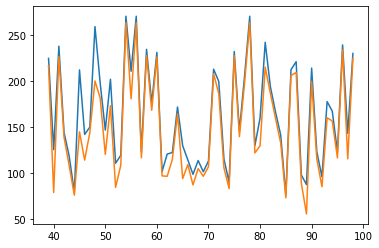

In [24]:
plt.plot(df[-60:][' return'])
# plt.plot(df[-100:][' cost'])
plt.plot(df[-60:][' return'] - df[-60:][' cost'])



In [32]:
df1 = pd.read_csv('data/1990_1999_daily_data.csv', index_col='Dates')[['SPX Index', 'SHCOMP Index', 'SENSEX Index', 'MXLA Index']]
df2 = pd.read_csv('data/2000_2019_daily_data.csv', index_col="Dates")[['SPX Index', 'SHCOMP Index', 'SENSEX Index', 'MXLA Index']]


In [36]:
df3 = pd.concat([df1,df2], ignore_index=False)


In [100]:
df = pd.read_csv("data/1990_2019_daily_data.csv", index_col='Dates')
df.index = pd.to_datetime(df.index)
df = df.sort_index()




TypeError: Field elements must be 2- or 3-tuples, got ''dt.''

In [104]:
alpha = 1
targets = []
def utility(weights):
    return -weights.T@mean + 0.5 * alpha * weights.T @ cov @ weights
for idx, tick in enumerate(df.iloc[500:].iterrows()):

    past500 = df.iloc[idx:idx+500].to_numpy()
    growth = util.daily_growth(past500)
    mean = np.mean(growth, axis=0)*256
    cov = np.cov(growth.T)*256
    x0 = np.ones(4) / 4
    cons = ({'type': 'eq', 'fun': lambda x: x.sum() - 1.0})
    bnds = [(0, 1)] * 4
    target_ratio = sp.optimize.minimize(utility, x0, method='SLSQP', bounds=bnds, constraints=cons)['x']
    targets.append(target_ratio)

In [108]:
targets = np.array(targets)

In [112]:
new_df = df.iloc[500:]
new_df[['tg1', 'tg2', 'tg3', 'tg4']] = targets

/Users/mcc_311/opt/anaconda3/envs/pythonProject/lib/python3.7/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [114]:
new_df.to_csv("data/1992_2019_daily_data_with_target.csv")

In [115]:
targets = new_df[['tg1', 'tg2', 'tg3', 'tg4']].to_numpy()
targets

array([[4.44089210e-16, 6.44429405e-01, 2.93213723e-01, 6.23568716e-02],
       [0.00000000e+00, 6.44447597e-01, 2.43179177e-01, 1.12373227e-01],
       [0.00000000e+00, 6.01674520e-01, 2.03243118e-01, 1.95082362e-01],
       ...,
       [4.92958471e-01, 0.00000000e+00, 5.07041529e-01, 0.00000000e+00],
       [5.50003465e-01, 1.30483731e-16, 4.49996535e-01, 0.00000000e+00],
       [3.65314793e-01, 2.70616862e-16, 6.34685207e-01, 9.54097912e-17]])

In [116]:
covs = []
means = []
for idx, tick in enumerate(df.iloc[500:].iterrows()):

    past500 = df.iloc[idx:idx+500].to_numpy()
    growth = util.daily_growth(past500)
    mean = np.mean(growth, axis=0)*256
    cov = np.cov(growth.T)*256
    covs.append(cov)
    means.append(mean)



In [117]:
means = np.array(means)
covs = np.array(covs)

In [121]:
np.save('data/means.npy', means)
np.save('data/cov.npy', covs)

In [122]:
cov = np.load('data/cov.npy')

In [127]:
cov[0].mean()

0.056293455458233395